In [1]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
from sklearn.model_selection import train_test_split
import re
from sklearn import preprocessing

In [53]:
subject_number = 'Subject Number'
age = 'Age (Years)'
gender = 'Gender'
height = 'Reported Height (cm)'
weight = 'Reported Weight (kg)'
shoe_size = 'Shoe Size NL'
pants_size='Pants Size Waist'
#measurements
waist = 'Waist Circumference, Pref (mm)'
neck='Neck Base Circumference (mm)'
hip= 'Hip Circumference, Maximum (mm)'
chest='Chest Circumference (mm)' #also known as bust
under_bust='Bust/Chest Circumference Under Bust (mm)'
# chest_italy='Chest Girth at Scye (Chest Circumference at Scye) (mm)'
crotch_height='Crotch Height (mm)'
shoe_size_italy="Shoe Size IT"


upper_chest='Chest Girth (Chest Circumference at Scye) (mm)'
italy_upper_chest="Chest Girth at Scye (Chest Circumference at Scye) (mm)"

malleolus_height_outer="Ankle Ht Rt (Malleolus, Lateral) (mm)"
malleolus_height_inner='Malleolus Med Rt (mm)'
outer_inseam='Outer Inseam'


thigh='Thigh Circumference (mm)'
shoulder_breadth='Shoulder Breadth (mm)'
waist_floor='Waist Height, Preferred (mm)'
arm_length='Arm Length (Shoulder to Wrist) (mm)'


rectangle='Rectangle'
triangle='Triangle'
inverted_triangle='Inverted Triangle'

In [54]:
demographic_path = "./dutch/demographic_metric.csv"
measurement_path = "./dutch/measurement_metric.csv"
extracted_path='./dutch/DutchExtracted.csv'

italy_extracted_path='./italy/ItalyExtracted.csv'
italy_demographic_path="./italy/ItalyDemographics_csv.csv"
italy_demographic_path="ItalyDemographics.csv"
italy_measurement_path="./italy/ItalyMeasurements_csv.csv"

In [87]:
demographic=[subject_number,gender,age, height, weight, shoe_size]
extracted=[subject_number,malleolus_height_inner,malleolus_height_outer]
mearuments=[subject_number,waist,chest,under_bust,neck,hip,crotch_height,thigh,shoulder_breadth,waist_floor,arm_length,upper_chest]
italy_demographic=[subject_number,gender,age, height, weight, shoe_size_italy]
italy_measurements=[subject_number,waist,chest,under_bust,neck,hip,crotch_height,thigh,shoulder_breadth,waist_floor,arm_length,italy_upper_chest]
additional=[subject_number]
feature_size=len(extracted)+len(mearuments)-2
#M_data=pd.read_csv(measurement_path,skipinitialspace=True)

In [88]:
demographic_data=pd.read_csv(demographic_path,skipinitialspace=True,usecols=demographic)
measurement_data=pd.read_csv(measurement_path,skipinitialspace=True,usecols=mearuments)
measurement_data=measurement_data[mearuments]
demographic_data=demographic_data.loc[demographic_data[gender]=='Female'] #shape  Male (567,6) Female (700,6)

data = demographic_data.merge(measurement_data, on=subject_number, how='left') #shape (567, *)

# data = data.drop(subject_number, axis=1)

dutch_extracted=pd.read_csv(extracted_path,skipinitialspace=True,usecols=extracted)

data=data.merge(dutch_extracted,on=subject_number,how='left')
data=data.drop(gender,axis=1)
data.head()

,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Bust/Chest Circumference Under Bust (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm)
0,11001,39,173.00,60.00,37,724.0,904.0,793.0,444.0,1000.0,799.0,565.0,406.0,1053.0,603.0,844.0,69.63,88.96
1,11002,31,168.00,62.00,39,690.0,859.0,751.0,401.0,1027.0,754.0,607.0,429.0,1004.0,566.0,870.0,NaN,NaN
2,11009,44,165.00,87.00,38.5,1014.0,1092.0,921.0,452.0,1135.0,739.0,654.0,460.0,1014.0,573.0,1011.0,66.33,88.43
3,11017,33,160.00,58.00,37,755.0,898.0,785.0,438.0,985.0,808.0,579.0,432.0,1014.0,568.0,891.0,69.68,80.97
4,11021,25,177.00,63.00,39,901.0,925.0,766.0,416.0,1052.0,865.0,596.0,388.0,1054.0,625.0,857.0,66.94,88.28


In [89]:
print(data.shape)
print(feature_size)

(700, 18)
13


In [90]:
data.dropna(axis=0,how='any',inplace=True) # shape (564,*)
data=data[data[height].str.contains("No Response")==False]
data = data[data[weight].str.contains("No Response") == False]
data = data[data[shoe_size].str.contains("No Response") == False]

total_features=data.shape[1]-1
features = data.columns.tolist()

target = features[-feature_size:] #get last column

    #features = list(set(features) - set([target]))
features = features[:-feature_size]
data[height] = pd.to_numeric(data[height])
data[weight]=pd.to_numeric(data[weight])
data[shoe_size]=pd.to_numeric(data[shoe_size])

print(features)


['Subject Number', 'Age (Years)', 'Reported Height (cm)', 'Reported Weight (kg)', 'Shoe Size NL']


In [91]:
print(data.shape)

(583, 18)


In [92]:

italy_demographic_data=pd.read_csv(italy_demographic_path,skipinitialspace=True,usecols=italy_demographic)
italy_measurement_data=pd.read_csv(italy_measurement_path,skipinitialspace=True,usecols=italy_measurements)
italy_measurement_data.rename(columns = {italy_upper_chest:upper_chest}, inplace = True)
italy_measurement_data=italy_measurement_data[mearuments]
italy_demographic_data=italy_demographic_data.loc[italy_demographic_data[gender]=='Female'] 

italy_demographic_data.columns=[subject_number,age,gender,height,weight,shoe_size]
italy_data=italy_demographic_data.merge(italy_measurement_data,on=subject_number,how='left')
italy_extracted=pd.read_csv(italy_extracted_path,skipinitialspace=True,usecols=extracted)

italy_data=italy_data.merge(italy_extracted,on=subject_number,how='left')
#italy_data=italy_data.drop(subject_number,axis=1)
italy_data=italy_data.drop(gender,axis=1)
# italy_data.rename(columns={chest_italy:chest}, inplace=True)
italy_data.head()



,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Bust/Chest Circumference Under Bust (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm)
0,4002,21.2,176.0,70.0,40.0,752.0,988.0,770.0,473.0,1048.0,838.0,608.0,431.0,1056.0,625.0,908.0,56.0,66.0
1,4003,57.9,166.0,60.0,38.0,759.0,965.0,781.0,481.0,1001.0,764.0,570.0,432.0,1003.0,583.0,914.0,58.0,72.0
2,4005,18.1,170.0,55.0,40.0,792.0,849.0,730.0,436.0,974.0,800.0,512.0,384.0,961.0,629.0,823.0,62.0,70.0
3,4006,26.0,165.0,51.0,37.5,716.0,851.0,714.0,439.0,930.0,798.0,529.0,378.0,983.0,613.0,838.0,70.0,70.0
4,4008,41.1,157.0,52.0,36.0,643.0,870.0,711.0,440.0,998.0,717.0,555.0,384.0,967.0,544.0,805.0,56.0,70.0


In [93]:
print(italy_data.shape)
italy_data=italy_data[italy_data[shoe_size].str.contains("44 or Larger|35 or Smaller")==False]
# italy_data=italy_data[italy_data[pants_size].str.contains("Don't Know|29.5 or Smaller|63 or Larger")==False]
italy_data = italy_data[italy_data[shoe_size].str.contains("Don't Know") == False]
italy_data.dropna(axis=0,how='any',inplace=True)
italy_data[shoe_size]=pd.to_numeric(italy_data[shoe_size])
# italy_data[pants_size]=pd.to_numeric(italy_data[pants_size])
italy_data.head()
print(italy_data.shape)

(388, 18)
(373, 18)


In [94]:
italy_data.loc[italy_data[subject_number] == 4205]


,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Bust/Chest Circumference Under Bust (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm)
91,4205,21.0,170.0,55.0,40.0,789.0,819.0,712.0,418.0,955.0,800.0,519.0,405.0,993.0,646.0,811.0,68.0,84.0


In [135]:

combined = [data, italy_data]

result = pd.concat(combined)


In [137]:
X = result[features]
y = result[target]
X.head()

,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL
0,11001,39.0,173.0,60.0,37.0
2,11009,44.0,165.0,87.0,38.5
3,11017,33.0,160.0,58.0,37.0
4,11021,25.0,177.0,63.0,39.0
5,11026,40.0,173.0,90.0,41.0


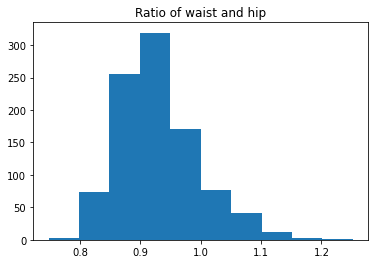

In [138]:
ratio=result[chest]/result[hip]
plt.hist(ratio)
plt.title("Ratio of waist and hip")
  

  
plt.show()

In [139]:
def check_ratio(bust,hip):
    ratio=bust/hip
    
    if ratio >=0.95 and ratio<=1.05: #measurement is within 20% of each other
        return rectangle
    elif ratio<0.95:
        return triangle
    else:
        return inverted_triangle

In [140]:
bust_hip=y[[chest,hip]]
#loop through each row and check ratio
bust_hip['shape']=bust_hip.apply(lambda row: check_ratio(row[chest],row[hip]),axis=1)
#count number of each ratio
bust_hip['shape'].value_counts()
bust_hip.head()
#cound number of each ratio
bust_hip['shape'].value_counts()



/var/folders/vp/xlqp6dbd0fl_qfy9thbvg9zc0000gn/T/ipykernel_19667/2066538845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bust_hip['shape']=bust_hip.apply(lambda row: check_ratio(row[chest],row[hip]),axis=1)


Triangle             651
Rectangle            246
Inverted Triangle     59
Name: shape, dtype: int64

In [141]:
encoder=preprocessing.OneHotEncoder().fit_transform(bust_hip['shape'].values.reshape(-1,1)).toarray()
#convert list to dataframe
# print(encoder)
bust_hip[inverted_triangle]=encoder[:,0] 
bust_hip[rectangle]=encoder[:,1]
bust_hip[triangle]=encoder[:,2]
# encoder=pd.DataFrame(encoder)
# #rename columns
# encoder.columns=[inverted_triangle,rectangle]
# #merge with chest_waist dataframe
# chest_waist=chest_waist.merge(encoder)
bust_hip.head()

/var/folders/vp/xlqp6dbd0fl_qfy9thbvg9zc0000gn/T/ipykernel_19667/1342479720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bust_hip[inverted_triangle]=encoder[:,0]
/var/folders/vp/xlqp6dbd0fl_qfy9thbvg9zc0000gn/T/ipykernel_19667/1342479720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bust_hip[rectangle]=encoder[:,1]
/var/folders/vp/xlqp6dbd0fl_qfy9thbvg9zc0000gn/T/ipykernel_19667/1342479720.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,Chest Circumference (mm),"Hip Circumference, Maximum (mm)",shape,Inverted Triangle,Rectangle,Triangle
0,904.0,1000.0,Triangle,0.0,0.0,1.0
2,1092.0,1135.0,Rectangle,0.0,1.0,0.0
3,898.0,985.0,Triangle,0.0,0.0,1.0
4,925.0,1052.0,Triangle,0.0,0.0,1.0
5,1080.0,1122.0,Rectangle,0.0,1.0,0.0


In [142]:
bust_hip=bust_hip.drop(chest,axis=1)
bust_hip=bust_hip.drop(hip,axis=1)
bust_hip.head()

,shape,Inverted Triangle,Rectangle,Triangle
0,Triangle,0.0,0.0,1.0
2,Rectangle,0.0,1.0,0.0
3,Triangle,0.0,0.0,1.0
4,Triangle,0.0,0.0,1.0
5,Rectangle,0.0,1.0,0.0


In [143]:
X=pd.concat([X,bust_hip],axis=1,join='inner')

#Train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
#Train and validation
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.20)

additional_df=pd.concat([X_test[subject_number],X_test['shape']],axis=1)
X_test=X_test.drop(subject_number,axis=1)
# X_test=X_test.drop(pants_size,axis=1)
X_train=X_train.drop(subject_number,axis=1)
# X_train=X_train.drop(pants_size,axis=1)
X_val=X_val.drop(subject_number,axis=1)
# X_val=X_val.drop(pants_size,axis=1)

In [144]:
X_train.to_csv("./female/X_train.csv",encoding='utf-8',index=False)
y_train.to_csv("./female/y_train.csv",encoding='utf-8',index=False)

X_test.to_csv("./female/X_test.csv",encoding='utf-8',index=False)
y_test.to_csv("./female/y_test.csv",encoding='utf-8',index=False)

X_val.to_csv("./female/X_val.csv",encoding='utf-8',index=False)
y_val.to_csv("./female/y_val.csv",encoding='utf-8',index=False)

additional_df.to_csv("./female/additional_df.csv",encoding='utf-8',index=False)


In [148]:
y_test.head()

,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Bust/Chest Circumference Under Bust (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm)
40,696.0,846.0,705.0,410.0,911.0,678.0,521.0,392.0,889.0,514.0,820.0,62.00,68.00
111,760.0,889.0,735.0,401.0,901.0,789.0,505.0,377.0,978.0,598.0,799.0,62.00,70.00
69,684.0,805.0,682.0,435.0,925.0,739.0,480.0,366.0,937.0,555.0,802.0,58.00,71.00
147,774.0,951.0,812.0,420.0,972.0,793.0,553.0,404.0,1020.0,560.0,832.0,69.37,83.58
693,1103.0,1339.0,1057.0,430.0,1226.0,772.0,689.0,490.0,1014.0,595.0,1147.0,64.58,82.92


In [146]:
print(additional_df)

     Subject Number              shape
40             4090           Triangle
111            4253          Rectangle
69             4153           Triangle
147           11438          Rectangle
693           16989  Inverted Triangle
..              ...                ...
66             4148           Triangle
389           15711          Rectangle
93            11294           Triangle
608           16582           Triangle
340           15595           Triangle

[192 rows x 2 columns]
